# Visualize river classification system

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import pickle
from matplotlib import colors
import matplotlib

%matplotlib inline

###### Parameters:

In [2]:
# domain dimensions:
imin, imax = 1479, 2179
jmin, jmax = 159, 799

# runoff period:
rf_year  = 2015
rf_month = 8    # september 

# colours:
c_continent = '#ce9169'
c_glacier   = '#36ab92' #'#76bce2'
c_other     = 'w'#'#a6a6a6'

### Load files:

River runoff forcing

In [3]:
rf_file = nc.Dataset(f'/ocean/brogalla/GEOTRACES/data/runoff/'+\
                     f'ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y{rf_year}.nc','r')
lon_rf  = np.array(rf_file.variables['nav_lon'])
lat_rf  = np.array(rf_file.variables['nav_lat'])
rf      = np.array(rf_file.variables['runoff'][rf_month])

# Place NaNs where there is no runoff
rf[rf == 0]       = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

River classification file
1. Glaciers
2. Continental
3. Other

In [4]:
ncd         = nc.Dataset('/ocean/brogalla/GEOTRACES/data/river_class-202005.nc')
river_class = np.array(ncd.variables['rclass'])

Meshmask

In [5]:
mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

##### Map with bathymetry background

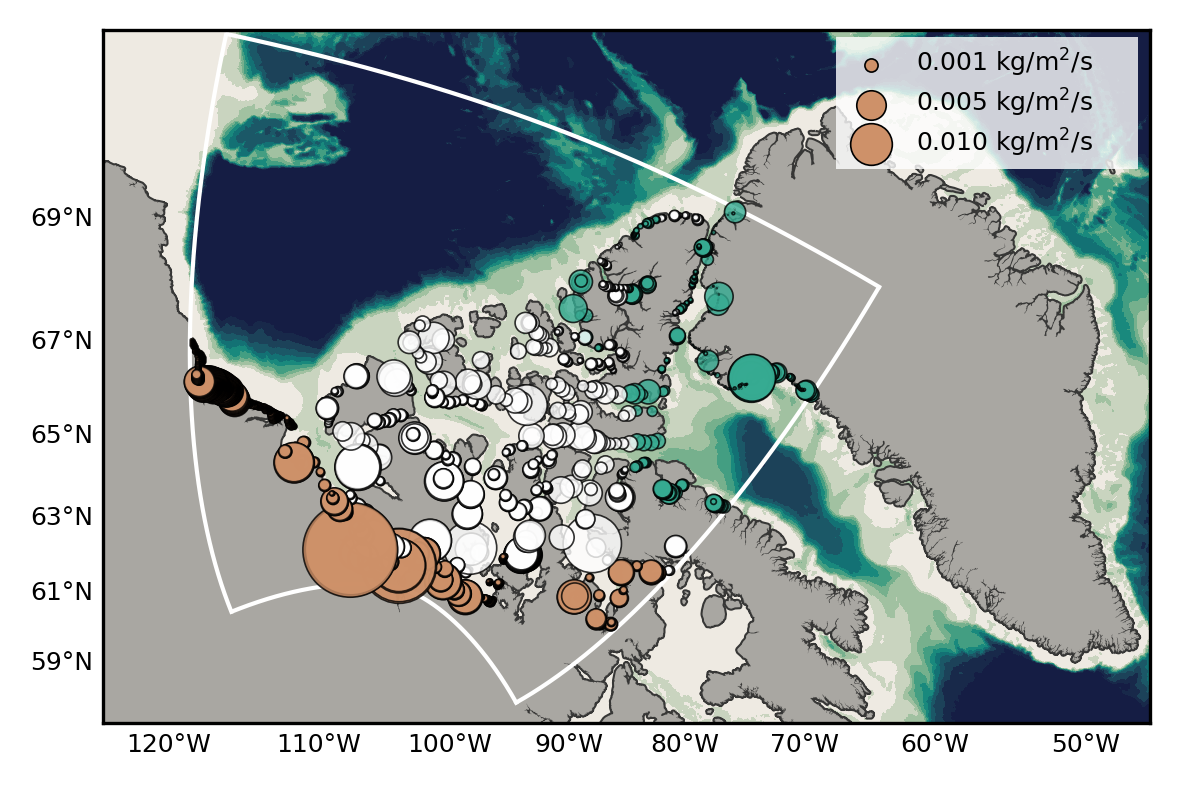

In [28]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/M3-surface.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(lon, lat) 
x_rf,    y_rf = proj1(lon_rf, lat_rf)

proj1.plot(x_sub[imin:imax,jmax]  , y_sub[imin:imax,jmax],   'w-', lw=1.0, zorder=2)
proj1.plot(x_sub[imin:imax,jmin]  , y_sub[imin:imax,jmin],   'w-', lw=1.0, zorder=2)
proj1.plot(x_sub[imin,jmin:jmax]  , y_sub[imin,jmin:jmax],   'w-', lw=1.0, zorder=2)
proj1.plot(x_sub[imax,jmin:jmax]  , y_sub[imax,jmin:jmax],   'w-', lw=1.0, zorder=2)

colormap = colors.ListedColormap([c_glacier, c_continent, c_other, c_other])
proj1.scatter(x_rf[imin:imax,jmin:jmax], y_rf[imin:imax,jmin:jmax], c=river_class[imin:imax,jmin:jmax],\
              s=rf[imin:imax,jmin:jmax]*1e4, alpha=0.8, cmap=colormap, edgecolor='k', linewidths=0.4, zorder=4)

# Draw rectangle behind colorbar:
pc = matplotlib.patches.Rectangle((31.5e5, 23.8e5), 13e5, 5.7e5, facecolor='w', zorder=3, alpha=0.8)
plt.gca().add_patch(pc)
for a in ['0.001', '0.005', '0.010']:
    proj1.scatter([], [], c=c_continent, alpha=1, s=float(a)*1e4, label=a + ' kg/m$^2$/s', \
                  edgecolors='k', linewidths=0.4, zorder=4)

ax1.legend(scatterpoints=1, frameon=False, labelspacing=0.3, fontsize=6, loc=(0.7,0.8))

fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202204/M3-river-classification.jpg', bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202204/M3-river-classification.svg', bbox_inches='tight', dpi=300, \
            format='svg')